## Assignment 01 
1. In order to print also the computational time for each important module (0.5/10)
2. Use 3 and 5 clusters with 1000 points (2/10)
3. Identify and solve the problems in the above implementation (check if it will pass naive tests) (1.5/10)
4. Create a k-Means function (similar to the above) which takes as input the k number of clusters (you do not know beforehand the number of clusters), and the m number of random points (as above). The final print should be similar to the above. Check for 1000, 10000, 100000 points for 3, 50, 100 clusters (4/10)
5. The above k-Means misses the termination step. As soon as all the points belong to a cluster and the centroids have been calculated, we can run a 2nd iteration to create better clusters using as initial centroids the final centroids of the 1st iteration. We can continue for as many iterations we want until a termination condition will be true (eg. the Euclidean distance of the centroids from the previous iteration to the centroids of the last iteration is less than a threshold). Write a k-Means algorithm including also the iteration step described above. (2/10)

# K-Means assignment:
###  Phases for implementation of K-Means algorithm are as follows:
    * preparing pseudocodes 
    * implementation of them in python 

## Overview
#### K-means algorithm categorizes the items into k groups. The criteria for similarity between points in each cluster is the euclidean distance, since the input data are coordinates in two dimensional space.
#### There are three general steps in clustering using K-means algorithm as same as any other algorithm:
    * Initialization: initializing k random centroids
    * Main body: Group each data point with one of the centroids based on Euclidean distance and Recalculate the position of each centroid.(means of points in each cluster)
    * Termination: it will stop iteration after doing a defined number of iteration
    
### Pseudocode for this algorithm is as follows: 
    
    input: a list of points, k(number of clusters)
 
    #### Initializing:
    initialize k centroids randomly. Choose k points from list of points
    remove centroids from the list of points
    create k empty lists (to hold points for each cluster in a separate list)
    
    #### Iterations(main):
    for a given number of iterations:
        clearing all points from clusters
        add centroids to the coresponding clusters
        iterate through the points:
            calculating distance from centroids 
            find the nearest centroid to the point
            allocate the point to the coresponding cluster
            update the centroid that a point added to its cluster
        
    output: K clusters of points, K centroids for each cluster         
                        
#### This assignment consists of different parts befor the last part which is definition of a function to get list of points and number of clusters and return the clusters as output automatically. The parts are comming in the folowing cells, but the first step for startig is importig required libraries and then define a function to create a list of points randomly.  
  

### Import requiered libreries

In [ ]:
import random
random.seed(42)
import time
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot as plt

### Function for creating a list of points randomly

In [ ]:
# k-Means (without functions)
"""
    INPUT:
    * A list points_l of m [x,y] points; x,y are real numbers, m positive integer greater than 1;
    * The number of clusters k; k is a positive integer; k >= 2
    * The property (properties) that we use in order to check if a point belongs to a cluster 
      (by default we use the Euclidean distance.)
    
    OUTPUT:
    *A list clusters_l which contains the k lists of the points which belong to the corresponding cluster.
"""
random.seed(42)
# create random n points of [x,y]: points_l
def rand_cluster(n,c,r):
    from random import random
    import math
    """
        Returns n random points in disk of radius r centered at point c
    """
    x,y = c
    points = []
    for i in range(n):
        theta = 2*math.pi*random()
        s = r*random()
        points.append([round(x+s*math.cos(theta),2), round(y+s*math.sin(theta),2)])
    return points

### Question 1. In order to print also the computational time for each important module (0.5/10)
     It is applied when it is applicable for all parts in codes. 

### Question 2. Use 3 and 5 clusters with 1000 points (2/10)

### 3 clusters with 1000 points

### 1. Initialization Step for 3 clusters

In [ ]:
# create 1000 points stored in list th_points_l
m = 1000
points_l = rand_cluster(m,[0,0],3)

k = 3 # number of clusters

# create k empty lists (clusters)
cluster0 = []
cluster1 = []
cluster2 = []

# randomly choose from the points_l, k points as the initial centroids of the clusters
# 1st centroid
cls0_centroid = random.choice(points_l)
print("cls0_centroid: " + str(cls0_centroid))

# remove this elmnt from the points_l
points_l.remove(cls0_centroid)
print(len(points_l)) #it should be m-1

# 2nd centroid
cls1_centroid = random.choice(points_l)
print("cls1_centroid: " + str(cls1_centroid))

# remove this elmnt from the points_l
points_l.remove(cls1_centroid)
print(len(points_l)) #it should be m-2

# 3rd centroid
cls2_centroid = random.choice(points_l)
print("cls2_centroid: " + str(cls2_centroid))

# remove this elmnt from the points_l
points_l.remove(cls2_centroid)
print(len(points_l)) #it should be m-3

# update the cluster0, cluster1 and cluster2 with the centroids
cluster0.append(cls0_centroid)
cluster1.append(cls1_centroid)
cluster2.append(cls2_centroid)

print("clusters: " + str(cluster0) + str(cluster1) + str(cluster2))


cls0_centroid: [-0.51, -0.6]
999
cls1_centroid: [0.13, -0.39]
998
cls2_centroid: [-1.36, 2.66]
997
clusters: [[-0.51, -0.6]][[0.13, -0.39]][[-1.36, 2.66]]


### 2. Iterative Step for 3 clusters

In [ ]:
st = time.time()

for point in points_l:
    if points_l==[]: # Termination Check: if there is no point in points_l, print the clusters, their centroids and the number of elements of them 
        print("Final Clusters: "  + str(cluster0) + str(cluster1) + str(cluster2))
        print("cls0_centroid: " + str(cls0_centroid))
        print("cls1_centroid: " + str(cls1_centroid))
        print("cls2_centroid: " + str(cls2_centroid))
        print("number of points in cluster0: " + str(len(cluster0)))
        print("number of points in cluster1: " + str(len(cluster1)))
        print("number of points in cluster2: " + str(len(cluster2)))
    # compute point distance from the centroid of each cluster
    else:
        list_d=[]
        d0 = distance.euclidean(point, cls0_centroid)
        list_d.append(d0)
        d1 = distance.euclidean(point, cls1_centroid)
        list_d.append(d1)
        d2 = distance.euclidean(point, cls2_centroid)
        list_d.append(d2)
        
        #  append the point to the cluster that the point has minimum distance with its centroid
        if sorted(list_d)[0]==d0: 
            cluster0.append(point)
        if sorted(list_d)[0]==d1: 
            cluster1.append(point)
        else: 
            cluster2.append(point)
        # remove the point from the points_l
        points_l.remove(point)
        # compute the new centroids for each cluster
        cls0_centroid = np.average(cluster0, axis=0)
        cls1_centroid = np.average(cluster1, axis=0)
        cls2_centroid = np.average(cluster2, axis=0)
et = time.time()
time1 = et - st
print("Cluster0: " + str(cluster0))
print("-")
print("Cluster1: " + str(cluster1))
print("-")
print("Cluster2: " + str(cluster2))
print("-")
print("cls0_centroid: " + str(cls0_centroid))
print("-")
print("cls1_centroid: " + str(cls1_centroid))
print("-")
print("cls2_centroid: " + str(cls2_centroid))
print("-")
print("number of points in cluster0: " + str(len(cluster0)))
print("-")
print("number of points in cluster1: " + str(len(cluster1)))
print("-")
print("number of points in cluster2: " + str(len(cluster2)))
print('Time for clustering: ',time1 )



Cluster0: [[-0.51, -0.6], [-0.17, -2.02], [0.72, -1.97], [1.04, -1.48], [0.89, -1.63], [1.28, -1.94], [1.18, -0.7], [0.33, -1.22], [0.13, -1.61], [1.8, -1.72], [2.05, -1.97], [-0.26, -2.0], [2.73, -0.54], [1.7, -0.34], [1.93, -1.8], [1.06, -1.83], [0.89, -1.51], [0.5, -2.61], [0.99, -2.45], [1.79, -1.85], [1.6, -0.19], [1.51, -1.06], [0.94, -2.05], [1.78, -1.34], [1.43, -1.8], [0.03, -2.5], [1.15, -0.31], [1.06, -1.46], [2.84, 0.18], [1.56, -0.23], [1.2, -1.24], [0.44, -1.82], [0.89, -1.48], [0.64, -1.52], [1.97, -0.15], [1.34, -0.72], [0.93, -0.94], [2.63, -1.43], [1.28, -1.35], [2.41, 0.14], [1.96, -0.27], [0.78, -2.1], [1.24, -2.53], [2.62, 0.42], [1.19, -0.42], [2.44, -0.78], [2.57, 0.05], [2.36, 0.22], [0.54, -2.54], [0.63, -1.54], [1.65, -2.42], [1.21, -2.09], [0.87, -0.58], [2.34, 0.87], [1.13, -1.46], [0.72, -1.82], [2.05, -0.42], [0.86, -0.35], [0.78, -1.85], [1.38, -0.47], [1.35, -2.28], [1.13, -2.02], [2.4, -0.52], [1.17, -1.18], [1.0, -1.83], [0.84, -1.42], [1.48, -1.0], [1

### 5 clusters with 1000 points

### 1. Initialization Step for 5 clusters

In [ ]:
m = 1000
points_l = rand_cluster(m,[0,0],3) # a list of 1000 points 

k = 5 # number of clusters

# create 5 empty lists (clusters)
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

# randomly choose from the points_l k points as the initial centroids of the clusters
# 1st centroid
cls0_centroid = random.choice(points_l)
print("cls0_centroid: " + str(cls0_centroid))

# remove this elmnt from the points_l
points_l.remove(cls0_centroid)
print(len(points_l)) #it should be m-1

# 2nd centroid
cls1_centroid = random.choice(points_l)
print("cls1_centroid: " + str(cls1_centroid))

# remove this elmnt from the points_l
points_l.remove(cls1_centroid)
print(len(points_l)) #it should be m-2

# 3rd centroid
cls2_centroid = random.choice(points_l)
print("cls2_centroid: " + str(cls2_centroid))

# remove this elmnt from the points_l
points_l.remove(cls2_centroid)
print(len(points_l)) #it should be m-3

# 4th centroid
cls3_centroid = random.choice(points_l)
print("cls3_centroid: " + str(cls3_centroid))

# remove this elmnt from the points_l
points_l.remove(cls3_centroid)
print(len(points_l)) #it should be m-4

# 5th centroid
cls4_centroid = random.choice(points_l)
print("cls4_centroid: " + str(cls4_centroid))

# remove this elmnt from the points_l
points_l.remove(cls4_centroid)
print(len(points_l)) #it should be m-5

# update the cluster0, cluster1 and cluster2 with the centroids
cluster0.append(cls0_centroid)
cluster1.append(cls1_centroid)
cluster2.append(cls2_centroid)
cluster3.append(cls3_centroid)
cluster4.append(cls4_centroid)

print("clusters: " + str(cluster0) + str(cluster1) + str(cluster2) + str(cluster3) + str(cluster4) )


cls0_centroid: [-0.7, 0.83]
497
cls1_centroid: [-1.79, 0.4]
496
cls2_centroid: [-1.49, -0.14]
495
cls3_centroid: [1.62, 2.16]
494
cls4_centroid: [0.32, -0.44]
493
clusters: [[-0.7, 0.83]][[-1.79, 0.4]][[-1.49, -0.14]][[1.62, 2.16]][[0.32, -0.44]]


### 2. Iterative Step for 5 clusters

In [ ]:
st = time.time()

# Termination Check: if there is no point in points_l, print the clusters, 
# their centroids and the number of elmnts of them
for point in points_l:
    if points_l==[]:
        print("Final Clusters: "+ str(cluster0) + str(cluster1) + str(cluster2)+ str(cluster3) + str(cluster4))
        print("cls0_centroid: " + str(cls0_centroid))
        print("cls1_centroid: " + str(cls1_centroid))
        print("cls2_centroid: " + str(cls2_centroid))
        print("cls3_centroid: " + str(cls3_centroid))
        print("cls4_centroid: " + str(cls4_centroid))
        
        print("number of points in cluster0: " + str(len(cluster0)))
        print("number of points in cluster1: " + str(len(cluster1)))
        print("number of points in cluster2: " + str(len(cluster2)))
        print("number of points in cluster3: " + str(len(cluster3)))
        print("number of points in cluster4: " + str(len(cluster4)))

    # compute point distance from the centroid of each cluster
    else:
        list_d=[]
        d0 = distance.euclidean(point, cls0_centroid)
        list_d.append(d0)
        d1 = distance.euclidean(point, cls1_centroid)
        list_d.append(d1)
        d2 = distance.euclidean(point, cls2_centroid)
        list_d.append(d2)
        d3 = distance.euclidean(point, cls3_centroid)
        list_d.append(d3)
        d4 = distance.euclidean(point, cls4_centroid)
        list_d.append(d4)
    # the point belongs to the cluster of minimum distance
        if sorted(list_d)[0]==d0: 
            cluster0.append(point)
        if sorted(list_d)[0]==d1: 
            cluster1.append(point)
        if sorted(list_d)[0]==d2: 
            cluster2.append(point)
        if sorted(list_d)[0]==d3: 
            cluster3.append(point)
        else: 
            cluster4.append(point)
        # remove the point from the points_l
        points_l.remove(point)
        # compute the new centroids for each cluster
        cls0_centroid = np.average(cluster0, axis=0)
        cls1_centroid = np.average(cluster1, axis=0)
        cls2_centroid = np.average(cluster2, axis=0)
        cls3_centroid = np.average(cluster3, axis=0)
        cls4_centroid = np.average(cluster4, axis=0)
    
et = time.time()
time1 = et - st
print("Cluster0: " + str(cluster0))
print("-")
print("Cluster1: " + str(cluster1))
print("-")
print("Cluster2: " + str(cluster2))
print("-")
print("Cluster3: " + str(cluster3))
print("-")
print("Cluster4: " + str(cluster4))
print("-")
print("cls0_centroid: " + str(cls0_centroid))
print("-")
print("cls1_centroid: " + str(cls1_centroid))
print("-")
print("cls2_centroid: " + str(cls2_centroid))
print("-")
print("cls3_centroid: " + str(cls3_centroid))
print("-")
print("cls4_centroid: " + str(cls4_centroid))
print("number of points in cluster0: " + str(len(cluster0)))
print("-")
print("number of points in cluster1: " + str(len(cluster1)))
print("-")
print("number of points in cluster2: " + str(len(cluster2)))
print("-")
print("number of points in cluster3: " + str(len(cluster3)))
print("-")
print("number of points in cluster4: " + str(len(cluster4)))
print('Time for clustering: ',time1 )

Cluster0: [[-0.7, 0.83], [-0.91, 2.06], [-0.27, 2.79], [-0.97, 2.52], [-0.99, 2.34], [0.24, 2.07], [-2.38, 1.31], [-1.35, 1.81], [-2.02, 0.86], [-1.42, 2.23], [-1.46, 0.74], [-2.41, 1.43], [0.16, 2.73], [-0.0, 2.54], [-0.91, 0.97], [-0.75, 0.93], [-1.48, 1.58], [-1.19, 1.78], [-0.87, 1.51], [-0.0, 1.92], [0.07, 1.25], [-1.85, 0.93], [-1.56, 1.16], [-1.64, 1.77], [-1.47, 2.18], [-1.66, 0.96], [-0.83, 1.99], [-0.59, 1.27], [0.03, 2.6], [-0.8, 0.9], [-0.55, 2.92], [-1.37, 1.49], [-2.34, 1.55], [-0.45, 2.78], [-1.61, 1.59], [-1.45, 0.87], [-2.15, 1.32], [-0.45, 2.9], [-1.41, 0.94], [-2.15, 0.95], [-1.24, 1.94], [-0.3, 1.12]]
-
Cluster1: [[-1.79, 0.4], [-2.78, -0.4], [-2.26, -1.91], [-1.21, -0.95], [-2.1, -0.52], [-2.67, 0.45], [-2.35, -1.61], [-1.38, -1.9], [-2.27, 0.16], [-1.33, -1.26], [-1.92, 0.36], [-1.24, -2.26], [-2.65, -0.85], [-2.2, -1.4], [-1.22, -1.41], [-1.84, -1.83], [-2.34, -0.7], [-2.95, -0.29], [-1.97, -1.48], [-1.66, -0.74], [-2.28, -0.37], [-2.28, -0.96], [-2.86, 0.46], [-

### Question 3. Identify and solve the problems in the above implementation (check if it will pass naive tests) (1.5/10)

1- Random choose of centroides hardly could lead to a proper clustering. for instance in case of that some of them or even all of them being absolutly close to each other.
 It could be ameliorated with updating each centroid after adding a point to a cluster. It means having the average of points in clusters as centroid. another solution could be seting the centroids after visualizing and choose them in a logical way. \
2- Choosing an inappropriate value for K will lead to an error. 
 it could be handeled with if statements like that one in the upcoming codes. 

### Question 4. Create a k-Means function (similar to the above) which takes as input the k number of clusters (you do not know beforehand the number of clusters), and the m number of random points (as above). The final print should be similar to the above. Check for 1000, 10000, 100000 points for 3, 50, 100 clusters (4/10)

In [ ]:
def K_means(K,m):
    
    points = rand_cluster(m,[0,0],3) # create m points stored in list points
    
    # 1- initilizing
    
    # if statements in order to handle inapropriate number for number of clusters
    if K<0:
        K=int(-K)
    elif K==0:
        print('K is zero and it has to be an integer')
        pass     
    else:
        K=int(K)
    
    centroids = random.sample( points , k=K) # randomly choose from the list of points, k points as the initial centroids of the clusters
    #print("first centroids: " + str(centroids))
        
    for centroid in centroids: # remove centroids from list of points
        points.remove(centroid)
    print("number of points after choosing centroids: ", len(points))
    
    clusters=[]
    for k in range(K):  # make a list for each cluster
        clusters.append([])
   
    for cluster in clusters:  # update the clusters with the centroids
        cluster_idx=clusters.index(cluster)
        cluster.append(centroids[cluster_idx])
        
    # 2- Iterative Step 
    st = time.time() # start of time for calculating interval time of iterative step
    
    for point in points: #Termination Check: if there is no point in points
        if points == []:
            break
            
        else: # compute distance from each point and all centroids
            distances=[]
            for centroid in centroids:
                d=distance.euclidean(point, centroid)
                distances.append(d)
            idx_min_d=distances.index(sorted(distances)[0]) 
            clusters[idx_min_d].append(point)  # assign the point to a cluster 
            centroids[idx_min_d] =list(np.average(clusters[idx_min_d], axis=0)) # update the centroid for updated cluster
        
    et = time.time()
    time1 = et - st
    for k in range(K):
        #print("cluster{}: ".format(k) , clusters[k])
        print("centroid{}: ".format(k) , centroids[k])
        print("number of points in each cluster{}: ".format(k) , str(len(clusters[k])))
    print('Iteration Time :', time1)
    
#
    

In [ ]:
K_means(3,1000)

997
first centroids: [[0.9, 0.71], [0.31, -0.78], [-0.44, -0.46]]
cluster0:  [[0.9, 0.71], [0.98, 2.08], [2.15, 0.37], [2.31, 1.07], [0.58, 0.7], [0.02, 1.99], [0.92, 1.59], [0.39, 2.21], [0.2, 1.1], [-0.78, 2.65], [2.14, 1.28], [1.77, 1.25], [2.05, 0.59], [1.02, 0.15], [1.86, 1.52], [-0.37, 2.08], [1.52, 1.32], [0.95, 1.79], [0.83, 0.75], [0.74, 0.9], [0.43, 0.75], [0.97, 2.33], [0.39, 1.08], [0.84, 1.47], [0.66, 0.14], [-0.56, 2.27], [0.25, 1.25], [0.04, 2.62], [0.77, 0.16], [1.44, 2.56], [-0.45, 1.66], [1.48, 1.69], [-0.34, 1.94], [0.59, 0.77], [0.04, 2.53], [-0.34, 1.61], [1.74, 1.87], [2.77, 0.28], [0.75, 1.15], [0.9, 0.6], [1.73, 0.99], [0.24, 0.15], [2.05, 1.29], [0.88, 0.67], [-0.35, 1.09], [1.54, 0.7], [0.55, 2.63], [0.24, 0.28], [0.03, 1.93], [0.02, 1.8], [0.5, 1.75], [0.44, 1.09], [0.66, 1.25], [0.59, 2.7], [-0.49, 2.08], [0.55, 0.81], [-0.48, 1.22], [0.1, 2.77], [1.37, 1.22], [1.88, 0.68], [1.49, 0.11], [1.99, 1.82], [2.42, 0.88], [0.24, 0.41], [1.05, 0.31], [0.03, 2.75], [

In [ ]:
K_means(3,10000)

9997
first centroids: [[2.72, -0.36], [-2.22, -2.0], [2.28, -0.82]]
cluster0:  [[2.72, -0.36], [2.16, 0.32], [2.43, 1.03], [1.6, -0.25], [2.05, -0.4], [1.02, -2.33], [2.76, 0.14], [1.35, -0.47], [1.29, 0.07], [1.12, 0.05], [0.73, -1.92], [0.45, -1.16], [1.39, -0.02], [1.58, -2.38], [2.18, 0.8], [1.27, 0.61], [1.02, -2.27], [1.66, 1.6], [1.35, 0.29], [1.41, -0.16], [2.71, 0.74], [1.97, -1.68], [1.73, 1.62], [1.56, 1.01], [2.71, -1.26], [1.17, -0.87], [1.34, -2.39], [1.91, 0.01], [2.55, 0.3], [1.21, 1.0], [2.29, 1.02], [1.8, 1.91], [1.39, 1.0], [1.02, -1.69], [2.11, 1.16], [1.55, 0.62], [1.16, -0.47], [1.33, -0.01], [0.97, -0.05], [0.68, -0.34], [1.3, -0.32], [1.78, -0.19], [2.44, 0.34], [1.04, 0.25], [0.95, -1.84], [1.76, -1.93], [2.09, 0.69], [1.49, 0.85], [1.14, 0.37], [1.3, 0.77], [1.11, 1.26], [2.1, 1.01], [1.7, 1.08], [0.9, 0.14], [1.84, -0.14], [1.32, -0.08], [2.68, 0.96], [2.33, -1.16], [1.18, -1.59], [1.31, -1.44], [1.89, -1.55], [1.64, 0.31], [1.57, -1.19], [0.98, 0.6], [1.78, 

In [ ]:
K_means(3,100000)

first centroids: [[-1.53, 0.39], [-1.22, -2.19], [-1.51, -0.08]]
number of points after choosing centroids:  99997
centroid0:  [0.8349137716700952, 0.4911441357954944]
number of points in each cluster0:  44243
centroid1:  [-0.07158928571428551, -1.4112584033613378]
number of points in each cluster1:  28560
centroid2:  [-1.274887671434345, 0.6882553222781952]
number of points in each cluster2:  27197
Iteration Time : 728.7703230381012


In [ ]:
K_means(50, 1000)

first centroids: [[-0.11, -1.19], [-0.65, 0.98], [2.0, 1.24], [2.46, -0.11], [-0.34, -0.17], [-1.35, -1.23], [1.07, -0.05], [-1.17, -2.03], [-2.7, 0.85], [-2.36, 0.51], [1.6, 2.11], [-0.13, 0.72], [-0.16, -2.44], [1.51, 2.19], [0.57, 0.76], [-0.01, -2.56], [-0.17, 1.07], [-1.79, -0.56], [0.56, -2.36], [1.97, 0.5], [0.79, 0.14], [1.64, -1.78], [-0.22, 0.02], [-0.03, -0.02], [1.05, 1.07], [-0.41, 0.79], [-2.42, -0.62], [-0.18, 0.36], [-0.54, 1.77], [0.65, -0.81], [-1.56, 0.89], [0.53, 1.42], [-0.77, -2.05], [1.25, 0.35], [-0.24, -2.07], [1.05, -0.62], [0.93, -2.2], [-0.27, -0.64], [-1.97, 0.32], [-1.33, 0.93], [-1.85, 2.1], [-1.36, -2.59], [1.9, -0.71], [0.44, -1.85], [0.36, -0.59], [-0.4, -1.66], [-1.76, 0.97], [0.84, 1.0], [-1.85, -1.85], [-0.81, -0.04]]
number of points after choosing centroids:  950
centroid0:  [0.1733333333333333, -1.1016666666666666]
number of points in each cluster0:  18
centroid1:  [-0.8140000000000001, 0.6424999999999998]
number of points in each cluster1:  20
c

In [ ]:
K_means(50, 10000)

first centroids: [[0.68, -0.96], [0.01, 0.29], [0.73, 0.74], [0.56, 1.74], [-0.04, -0.02], [0.21, -0.26], [-0.13, -1.87], [-0.02, 0.16], [-0.23, 0.15], [-0.76, -1.26], [1.43, 1.22], [0.06, -0.03], [0.16, -0.05], [-0.51, 1.12], [-0.38, -0.69], [2.02, -0.43], [-0.84, -0.73], [0.28, -0.52], [0.06, -0.23], [-2.17, -1.77], [2.22, -0.98], [0.86, 1.52], [-1.81, -0.58], [-0.55, -1.86], [-1.61, 1.92], [-1.21, 1.16], [-0.67, 1.29], [0.57, 0.54], [-0.06, -1.22], [1.67, 1.5], [-0.13, -2.97], [2.34, -0.39], [-0.18, 0.5], [-1.12, 0.8], [0.23, 0.17], [2.03, 1.8], [-2.37, 0.82], [-0.94, -2.34], [-1.39, -2.2], [1.83, -2.34], [1.64, 1.67], [0.52, -0.19], [-0.1, -0.11], [-1.42, -1.22], [0.26, 0.58], [-0.63, -0.04], [-0.81, 0.32], [-1.83, -1.96], [1.16, -2.52], [0.35, -0.85]]
number of points after choosing centroids:  9950
centroid0:  [1.175863453815261, -1.0365863453815254]
number of points in each cluster0:  249
centroid1:  [0.227969543147208, 0.40979695431472074]
number of points in each cluster1:  19

In [ ]:
K_means(50, 100000)

first centroids: [[-2.07, -1.61], [0.23, 2.08], [0.2, 0.05], [0.82, -0.59], [-0.33, -1.33], [-0.53, 0.25], [-0.49, 0.67], [0.37, 0.01], [0.11, 0.08], [2.76, 0.56], [0.3, 2.59], [-0.08, -0.17], [-0.01, -0.35], [-1.57, 1.2], [-0.48, -2.7], [-1.94, 1.19], [0.91, -0.15], [0.07, -1.05], [-1.41, 1.46], [-2.01, -1.31], [0.76, -0.62], [-0.48, 1.37], [1.74, 0.5], [0.11, 0.27], [-1.29, -1.08], [-0.14, -0.55], [0.71, -1.97], [-0.46, 1.68], [0.19, -0.28], [1.47, -1.21], [-1.95, -1.52], [-0.22, -1.1], [1.2, -1.19], [1.6, -1.03], [-0.51, -0.22], [-0.24, -0.07], [-0.77, 2.22], [-0.58, 1.11], [2.07, -0.72], [-0.37, 0.18], [-0.77, 1.55], [-2.41, 1.12], [0.49, -1.16], [-0.99, -0.53], [-0.44, 1.46], [0.06, -2.42], [0.32, -0.01], [0.18, 2.67], [0.73, 2.22], [-1.13, 1.15]]
number of points after choosing centroids:  99950
centroid0:  [-1.5627386634844866, -2.043579952267305]
number of points in each cluster0:  1676
centroid1:  [0.7398626373626389, 1.5081501831501827]
number of points in each cluster1:  218

In [ ]:
K_means(100, 1000)

first centroids: [[2.0, -0.36], [2.27, 1.06], [0.1, -0.17], [0.81, -0.91], [1.71, -0.02], [-0.58, -0.97], [2.32, 1.36], [0.36, -1.76], [0.81, 0.73], [0.07, 2.61], [-2.34, 0.01], [2.61, 0.32], [-1.05, 2.34], [0.32, 0.6], [-0.08, 0.76], [0.71, 0.09], [0.64, 1.51], [-0.48, 1.31], [1.16, 1.61], [-0.45, -0.25], [0.03, 0.02], [-1.24, 0.32], [0.27, 1.69], [2.79, -0.85], [0.18, 0.94], [-0.39, 0.21], [0.02, 2.23], [0.36, -0.81], [1.72, 1.34], [2.12, -1.73], [-0.52, -1.13], [-0.03, 1.34], [-0.78, 1.01], [-0.71, 0.77], [-0.97, -1.05], [-2.82, 0.37], [-1.31, -0.4], [2.45, -0.61], [1.71, -0.8], [2.1, 0.71], [-1.09, 1.64], [-0.02, -0.02], [0.01, 0.46], [-0.2, 0.78], [-0.0, 0.51], [-2.26, -0.39], [-0.24, 0.31], [-0.89, 0.16], [0.56, 1.24], [-0.86, 0.46], [-0.08, -1.17], [-1.11, 0.32], [-0.83, -0.42], [2.61, 0.98], [2.14, 0.59], [2.66, 1.17], [-0.25, -0.66], [1.9, 0.15], [2.35, 0.02], [-0.01, 0.09], [-1.0, 1.42], [-1.27, 2.45], [1.65, 2.22], [-1.49, -0.56], [0.86, -0.2], [-0.45, -0.69], [-0.06, 0.04],

In [ ]:
K_means(100, 10000)

first centroids: [[0.28, 1.4], [-2.78, 0.52], [2.3, 0.1], [-0.61, -2.4], [2.64, -0.6], [1.72, -0.03], [0.23, 0.23], [-1.26, -0.33], [0.7, -1.27], [0.1, 2.22], [0.48, -2.56], [1.16, 0.67], [1.19, -2.38], [-0.01, -0.02], [-0.4, -2.32], [-0.17, -0.05], [-1.2, -1.12], [-0.12, -2.12], [0.33, -0.58], [-0.21, -1.46], [0.33, -0.37], [-2.17, 0.64], [0.39, -0.71], [-0.01, 0.01], [0.04, 0.01], [0.36, 1.12], [-1.64, -0.14], [-2.58, -0.97], [-1.58, -1.87], [-1.14, 0.49], [-1.41, 1.69], [-0.42, -2.26], [-0.24, -1.38], [-1.4, -0.05], [-0.57, -1.61], [0.92, 1.32], [-0.57, 2.47], [0.28, 0.99], [-1.77, -1.51], [-1.38, 0.54], [-1.29, -2.07], [-2.56, 1.42], [-1.17, 1.33], [-0.27, 0.28], [0.47, 0.66], [0.91, 2.38], [-0.88, -1.02], [-2.02, -0.04], [0.02, 0.16], [-0.11, 0.18], [-0.62, 0.83], [-0.14, 0.1], [-0.17, -0.11], [2.53, -1.51], [-0.14, -0.22], [-2.64, 0.23], [0.03, -0.01], [-0.15, 2.52], [0.29, 0.83], [0.68, -0.05], [0.03, 2.52], [-2.38, 0.81], [-0.29, -0.48], [0.56, 1.51], [-1.21, -0.45], [1.65, 1.3

In [ ]:
K_means(100, 100000)

first centroids: [[0.19, -1.47], [-2.03, 0.52], [-2.48, -0.57], [-1.24, 1.37], [0.02, 0.04], [-0.27, 2.92], [-1.17, -0.35], [-0.93, -1.2], [-0.29, -0.49], [1.65, 0.41], [2.4, -0.33], [-0.22, 0.38], [-0.28, 0.54], [-0.19, -0.25], [0.04, -0.08], [-0.27, 1.43], [-1.11, 0.47], [-0.08, 0.02], [0.37, 1.98], [0.22, 0.13], [0.06, 0.0], [-1.42, -0.56], [-2.03, 1.15], [0.12, -0.13], [0.25, 0.58], [0.16, -0.81], [1.42, 1.35], [-1.42, -1.51], [2.27, -1.7], [0.54, -0.12], [0.63, 0.54], [1.83, -0.49], [-2.35, 0.16], [0.73, -1.08], [0.79, 1.26], [1.48, 0.25], [-0.11, -2.47], [-1.61, 2.06], [-0.71, 2.06], [-0.37, 0.92], [0.01, -0.02], [-0.26, -0.02], [-0.87, 0.13], [0.43, 0.26], [-0.38, -0.52], [0.45, -2.54], [-0.66, 0.3], [0.45, -1.18], [-0.72, -0.48], [-1.47, 0.62], [0.07, 2.86], [-1.12, 1.05], [-0.41, 1.51], [2.1, 0.28], [1.92, -0.45], [-2.67, -1.15], [1.76, -2.08], [0.97, 0.22], [2.51, -0.78], [1.74, -0.11], [0.27, 0.27], [-0.01, -2.21], [0.29, 1.36], [-0.58, 0.02], [2.82, -0.1], [1.03, 0.87], [-0

### Question 5. The above k-Means misses the termination step. As soon as all the points belong to a cluster and the centroids have been calculated, we can run a 2nd iteration to create better clusters using as initial centroids the final centroids of the 1st iteration. We can continue for as many iterations we want until a termination condition will be true (eg. the Euclidean distance of the centroids from the previous iteration to the centroids of the last iteration is less than a threshold). Write a k-Means algorithm including also the iteration step described above. (2/10)
* In following function parameter of iteration is added to the previous function. Therefore, after getting centroid and updating after assigning each new point to a cluster (get average of points in each cluster as centroid)  it keeps iteration. In new iteration the initial centroids are the final centroids of previous iteration. It will continue until the end of number of iterations(defined by user).    In this way, the centroids keep updating and adjusting. So, the final centroids will be determined more resonably. Hence, clusters would be defined more precisely and more discreted.

first centroids: [[-0.17, -2.02], [-0.1, 0.66], [-0.96, -1.32], [0.01, -0.02]]
final Centroids:  [[0.908, -1.6900000000000002], [-0.18999999999999997, 1.4566666666666666], [-2.84, -0.6600000000000001], [0.2314285714285714, 0.02857142857142857]]
Time : 0.11067032814025879


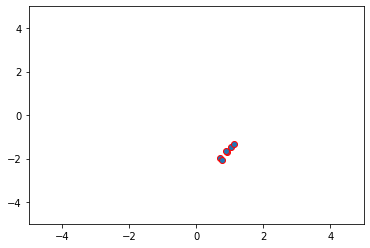

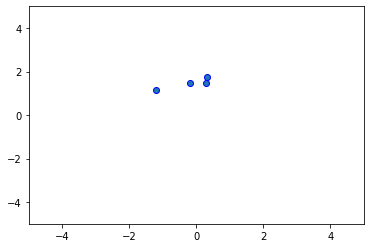

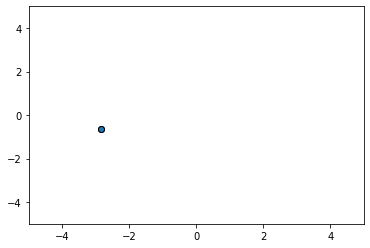

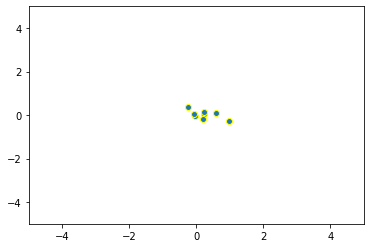

In [ ]:
def K_means(K,m,iterations):
    
    random.seed(42)
    points=rand_cluster(m,[0,0],3) # create m points stored in list points
    if K<0:
        K=int(-K)
    elif K==0:
        print('K is zero and it has to be an integer')
        pass     
    else:
        K=int(K)
    
    # 1- initilizing
    clusters=[]
    
    centroids = random.sample(points , k=K) # randomly choose from the points k points as the initial centroids of the clusters
    print("first centroids: " + str(centroids))
        
    for centroid in centroids:
        points.remove(centroid)
    #print("number of points after choosing centroids: ", len(points))
    
    for k in range(K):  # make a list for each cluster
        clusters.append([])
   
   
    # 2- Iterative Step 
    st = time.time() # start time for iteration
     ## make iterations with centroids from the prevoius iteration
    for iteration in range(iterations): # this lop will be terminated when the 
    
        for cluster in clusters:
            cluster.clear()
            cluster_idx=clusters.index(cluster)
            cluster.append(centroids[cluster_idx])
        for point in points: #Termination Check: it be terminated when distance calculation of all points in points list finish. 
            distances=[]
            for centroid in centroids:
                d=distance.euclidean(point, centroid)  # compute point distance from the centroid of each cluster
                distances.append(d)
                
            idx_min_d=distances.index(sorted(distances)[0]) # finding the index of cluster that the point belongs to
            clusters[idx_min_d].append(point)
            
            centroids[idx_min_d] = list(np.average(clusters[idx_min_d], axis=0)) # updating the centroid of cluster which has just been updated
            #print('centroids', centroids)
               
    et = time.time() #  end of iteration time 
    time1 = et - st # time calculation for iteration
    
    #for k in range(K):
        #print("cluster{}: ".format(k) , clusters[k])
        #print("centroid{}: ".format(k) , centroids[k])
        #print("number of points in cluster{}: ".format(k) , str(len(clusters[k])))
    print('final Centroids: ', centroids)
    print('Time :', time1)
    
    ## visulizing clusters
    color=['red','blue','black','yellow']
    for k in range(K):
        data=np.array(clusters[k])
        x, y = data.T
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.scatter(x,y,edgecolors=color[k])
        plt.show()

       
K_means(4,20,100)
    

## Assignment 02

0. modify it accordingly (not mandatory)
1. Create a flowchart of Dijkstra's algorithm (not mandatory)
2. Write down Dijkstra's algorithm (+ pseudocode) and implement it 
3. Apply it to the above G1 and G2 graphs (Input: a graph G, the Origin node and the Destination node; Output: the shortest path from Dijkstra's algorithm (similar to the ouput of nx.ijkstra_path)

## Dijkstra's Algorithm

## Question 2. Write down Dijkstra's algorithm (+ pseudocode) and implement it 

### In Dijkstra's algorithm the followings are considering:
1. The motivation for Dijkstra's algorithm is finding the shortest path between two points.
2. The cost for a path that connects two nodes is calculated by adding weights of edges in that path
3. The shortest path is the path with minimum cost

* Input: A list of nodes , a list of edges ,a list of weights (coresponding to each edge), origin(starter node), destination(end node)
* output: shortest path from origin to destination, cost of path

#### Considering the above Input the bellow steps are followed to get the output:
Step1: Define a function to return a matrix represented all nodes and weights coresponding to each edge. \
Step2: Define a function to convert the matrix in previous step to a dictionary. It is worth mentioning that this step could be skipped but it was easer to deal with a dictionary instead of a matrix. \
 Step3: Define a function to return the dictionary of visited points. this is the main part. \
Step4: Define a function to display the shortest path beween origin and destination as well as its cost. 

These four steps will be iluustrated in following cells.

### Step 1: Define a function to return a matrix represented all nodes and weights coresponding to each edge


In [ ]:
def matrix_of_graph(nodes,edges,weight):
    '''
    define a matix for graph. all parameters should be a list 
    '''
    array=np.zeros((len(nodes),len(nodes))) # define a zero array whith the shape that in both dimention is equal to number of nodes
                        
    for edge in edges: #  replace zores in the array where there are edges
        array[nodes.index(edge[0]),nodes.index(edge[1])]=weight[edges.index(edge)]
    array = array + array.transpose()
    return array

### Step 2: Define a function to convert the matrix in previous step to a dictionary.


In [ ]:
array=matrix_of_graph(nodes,edges,weight)

def dictionary_of_graph(array, nodes):
    '''
    define a dictionary for graph. Parameters are array from previous step and list of nodes.  
    '''
    d={} # define a dictionary 
    for node in nodes:
        d[node]={}
        
    for node in nodes: ## fill dictionary with edges and corresponding nodes
        for n in nodes:
            if array[nodes.index(node),nodes.index(n)]!=0:
                d[node][n]={}
                d[node][n]['w']=array[nodes.index(node),nodes.index(n)]
    return d

### Step3: Define a function to return the dictionary of visited points. this is the main part. 
#### Inputs: graph dictionary from previous step, origin node
#### Output: dictionary of visited point. The keys of this dictionary is nodes and it's values is a list of its cost and previous neighbour.
1. Initializing:
* Creating visiting dictionary for nodes that their cost is updated
* Creating unvisited dictionary for all nodes  
* Set a large value as cost for all of the nodes except origin node which assign to zero. the reason for a very large cost is to ilustrating that it is not visited yet.
* set the previous node for all nodes as None 
2. Main part:
* Pick the point which has the lowest cost. For first time it is origin ,since its cost is zero. It becomes the Current State Node(CSP).
* Examine nodes in neighbourhood of CSP ,those which are not in visited dictionary.
* Calculating new cost for neighbour. update the cost if it is smaller than the previous one. cost of each node is equal to the cost of previous node plus weight of the edge conecting these two nodes. 
* Update the prvious node of the node that it's cost updated in previous step. 
* when all neighbours of a node examined, that node could be removed from the unvisited dictionary and adding to visited dictionary with its cost and previous node.
* All steps in Main part repeated until the length of dictionary of unvisited point become zero.
3. return visited dictionary 
4. Termination condition is when the unvisited dictionary is zero. it means all of them are visited. 

### Pseudocode 

    input:graph dictionary from previous step, origin node 
    Output: dictionary of visited point; The keys of this dictionary is nodes and it's values is a list of its cost and previous neighbour.
### Initializing 
    set the visited Dictionary 
    set the unvisited Dictionary 
    For each node in graph: 
         Add node to the unvisited Dictionary with distance of alarge number and previous node of None 
    Set the origin node's distance to 0 in the unvisited Dictionary
### main part
    While the unvisited Dictionary is not empty:# Termination condition
        Set current node to the node with the lowest cost from the unvisited Dictionary
        Copy cost and previous values for current node from the unvisited Dictionary to the visited Dictionary
        Remove the current node from the unvisited Dictionary
        
        For each neighbour of current node:
            If neighbour is not in the visited Dictionary
                Calculate new cost = weight of edge + cost of current node
                If new cost is less than neighbour's cost in unvisited Dictionary
                    Update the neighbour's cost to become the new cost
                    Update the neighbour's previous node to become the current node

    Return the visited dictionary

### Implementation

In [ ]:
graph=dictionary_of_graph(array, nodes)

def dijkstra_shortest_path(graph,start_node):
    # 1-Initializing
    unvisited={}
    visited={}
    for key in graph: # set the cost of all nodes equal to a large number and its previous node equal to None
        if key==start_node:
            unvisited[key]=[0, None]
        else:
            unvisited[key]=[1000, None]
            
    while True:
        if len(unvisited) !=0: # Termination condition 
            current_min_value=min([unvisited[key][0] for key in unvisited]) # finding minimum value in unvisited dictionary
            CSP=[key for key in unvisited if unvisited[key][0]==current_min_value][0] # this zero is for taking out the value from the list 
            neighbours=set(graph[CSP]) # finding neighbours 
            for neighbour in neighbours:
                if neighbour not in visited:
                    cost= unvisited[CSP][0]+ graph[CSP][neighbour]['w'] # neighbour cost
                    if cost<unvisited[neighbour][0]:
                        unvisited[neighbour][0]=cost # replace the cost of neighbour with new cost if new one is smaller
                        unvisited[neighbour][1]=CSP
            visited[CSP]=unvisited[CSP] # add the current state point to visited dictionary
            unvisited.pop(CSP) # remove the currrent state point from unvisited dictionary
        else:
            break
    return visited 

### Step4: Define a function to display the shortest path beween origin and destination as well as its cost.

### Pseudocode 

Input: origin node, visited dictionary from previous function, destination node \
Output: Path from origin node to destination node
        
    for each key in visited
        if key is not origin   
            current = key        
            path = current
            while current is not origin # Termination condition 
                previous = visited[current][PREVIOUS]  
                path = previous + path                        
                current = visited[current][PREVIOUS]  
            if key is destination 
                print("Path from origin to destination)
                print(cost)
                
        


### Implementation

In [ ]:
visited=dijkstra_shortest_path(graph,'A')
def display_shortest_paths(start_node,visited,destination):
    
    for key in visited:
        if key!= start_node:
            current=key
            path=current
            while current!=start_node:
                previous=visited[current][1] # Get value of previous node
                path=previous+path # Add value to path 
                current=visited[current][1]
            if key==destination:
                print("path for: " + key) 
                print(path)
                print("cost: " ,visited[key][0])
            



## Question 3. Apply it to G1 and G2 graphs (Input: a graph G, the Origin node and the Destination node; Output: the shortest path from Dijkstra's algorithm (similar to the ouput of nx.ijkstra_path)

In [ ]:
# G1
nodes_G1=['A', 'B','C', 'D']
edges_G1=[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ]
weights_G1=[2,2,5,3]

array_G1=matrix_of_graph(nodes_G1,edges_G1,weights_G1)
graph_G1=dictionary_of_graph(array_G1, nodes_G1)
visited_G1=dijkstra_shortest_path(graph_G1,'A')
display_shortest_paths('A',visited_G1,'D')

path for: D
ABD
cost:  5.0


In [ ]:
# G2
nodes_G2=['A', 'B','C', 'D']
edges_G2=[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'),('C','D')]
weight_G2=[2,2,5,3,1]

array_G2 = matrix_of_graph(nodes_G2,edges_G2,weight_G2)
graph_G2 = dictionary_of_graph(array_G2, nodes_G2)
visited_G2 = dijkstra_shortest_path(graph_G2,'A')
display_shortest_paths('A',visited_G2,'D')

path for: D
ACD
cost:  3.0
